# Sales Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

### Merge the 12 months of Data into single task

In [2]:
df=pd.DataFrame()

files=[file for file in os.listdir('./Sales_Data/')]

for file in files:
    tmp=pd.read_csv("./Sales_Data/"+file)
    df=pd.concat([df,tmp])
    
df.to_csv('./Output/all_data.csv',index=False)
df.head()   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Cleanup data

#### Drop NaN

In [3]:
nan_df= df[df.isnull().any(axis=1)]
nan_df.head()

df.dropna(how='all',inplace=True)

#### Find or and delete it

In [4]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

#### Add Month Column

In [5]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int8')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Column

In [6]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

In [7]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add City Column

In [8]:
city_df=df['Purchase Address'].str.split(pat=',',expand=True)
df['City']=city_df[1]
state_df=city_df[2].str.split(expand=True)
df['State']=state_df[0]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


#### Add Order Time Column

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


#### Best Sales month and Earning that month

In [10]:
results= df.groupby('Month',as_index=False).sum()
display(results)

,Month,Quantity Ordered,Price Each,Sales,Hour,Minute
0,1,10903,1.811768e+06,1.822257e+06,139485,282440
1,2,13449,2.188885e+06,2.202022e+06,172669,354885
2,3,17005,2.791208e+06,2.807100e+06,218969,447559
3,4,20558,3.367671e+06,3.390670e+06,262259,544186
4,5,18667,3.135125e+06,3.152607e+06,238780,487899
5,6,15253,2.562026e+06,2.577802e+06,195528,402436
6,7,16072,2.632540e+06,2.647776e+06,206169,417349
7,8,13448,2.230345e+06,2.244468e+06,172289,353857
8,9,13109,2.084992e+06,2.097560e+06,168513,341698
9,10,22703,3.715555e+06,3.736727e+06,290650,598437


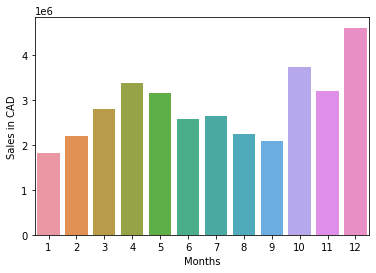

In [11]:
sns.barplot(data=results,x=results['Month'],y=results['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in CAD')
plt.show()

#### City with highest sales

In [12]:
results= df.groupby('City',as_index=False).sum()
display(results)

,City,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
0,Atlanta,16602,2.779908e+06,104794.0,2.795499e+06,214264,442932
1,Austin,11153,1.809874e+06,69829.0,1.819582e+06,141946,289060
2,Boston,22528,3.637410e+06,141112.0,3.661642e+06,288225,590442
3,Dallas,16730,2.752628e+06,104620.0,2.767975e+06,214390,435155
4,Los Angeles,33289,5.421435e+06,208325.0,5.452571e+06,427444,866638
5,New York City,27932,4.635371e+06,175741.0,4.664317e+06,357696,733598
6,Portland,14053,2.307747e+06,87765.0,2.320491e+06,179632,368389
7,San Francisco,50239,8.211462e+06,315520.0,8.262204e+06,643265,1319477
8,Seattle,16553,2.733296e+06,104941.0,2.747755e+06,213292,436368


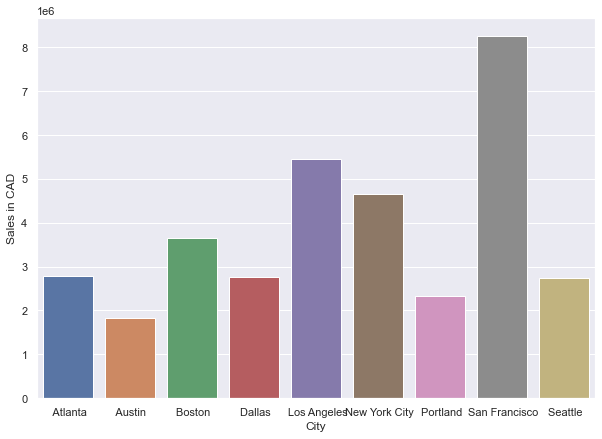

In [13]:
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(data=results,x=results['City'],y=results['Sales'])
plt.xlabel('City')
plt.ylabel('Sales in CAD')
plt.show()

#### What time should the advertisements be displayed for maximizing likelihood of customer buying product

In [14]:
results=df.groupby('Hour',as_index=False).sum()
display(results)

,Hour,Quantity Ordered,Price Each,Month,Sales,Minute
0,0,4428,709296.70,27554.0,713721.27,103596
1,1,2619,458490.00,16657.0,460866.88,61807
2,2,1398,233833.64,8507.0,234851.44,32508
3,3,928,144726.42,5904.0,145757.89,23044
4,4,937,162058.18,6148.0,162661.01,26876
5,5,1493,229621.21,9301.0,230679.82,42877
6,6,2810,445000.11,17539.0,448113.00,80343
7,7,4556,740568.11,28850.0,744854.12,127447
8,8,7002,1185970.62,43626.0,1192348.97,198135
9,9,9816,1628498.49,60981.0,1639030.58,268253


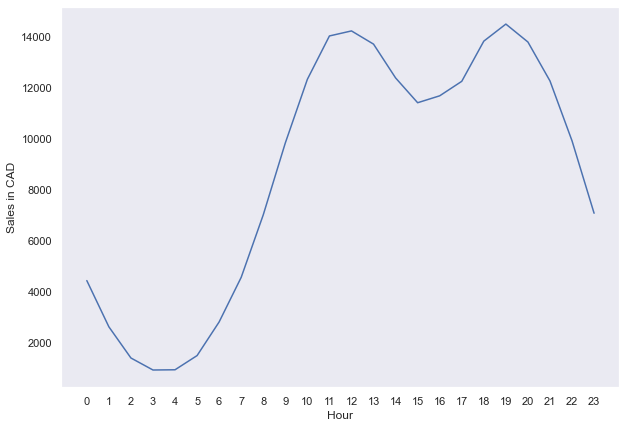

In [15]:
sns.lineplot(data=results,x=results['Hour'],y=results['Quantity Ordered'])
plt.xticks(results['Hour'])
plt.ylabel('Sales in CAD')
plt.grid()
plt.show()

#### Products sold together

In [54]:
#order_id_df=df.loc[:,['Order ID']]
order_id_df=df[df['Order ID'].duplicated(keep=False)]
display(order_id_df.head(20))
order_id_df['Grouped Products']=order_id_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
order_id_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,CA,17,0
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,CA,17,0
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,NY,11,7
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,NY,11,7


C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Grouped Products
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [57]:
from itertools import combinations
from collections import Counter

count= Counter()

#count products based of pairs
for row in order_id_df['Grouped Products']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

#display results    
for key,value in count.most_common(15):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253
('Lightning Charging Cable', 'Apple Airpods Headphones') 214
('USB-C Charging Cable', 'Bose SoundSport Headphones') 211
('Vareebadd Phone', 'Bose SoundSport Headphones') 182
('Apple Airpods Headphones', 'Wired Headphones') 170
('Bose SoundSport Headphones', 'Wired Headphones') 140


#### What product sold most and why?

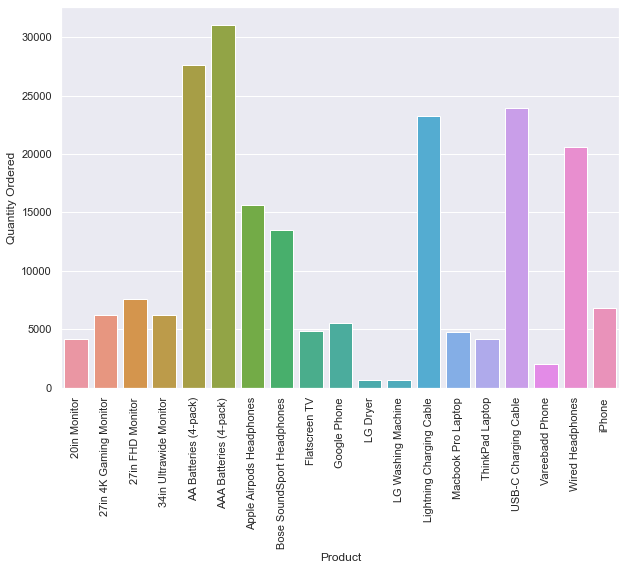

In [101]:
product_group=df.groupby('Product')
quantity_sum=product_group.sum()['Quantity Ordered']
quantity_ordered=pd.DataFrame(quantity_sum).reset_index()
quantity_ordered.columns=['Product','Quantity Ordered']
sns.barplot(data=quantity_ordered,x=quantity_ordered['Product'],y=quantity_ordered['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.show()

In [102]:
prices=df.groupby('Product').mean()['Price Each']